In [1]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [2]:
# Read the data with pandas

df = pd.read_csv("iris.csv", header=0)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# EDA Process 

In [3]:
# Checking the shape of the data
df.shape

(150, 5)

In [4]:
# Reading random Rows of the data

df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
19,5.1,3.8,1.5,0.3,setosa


In [5]:
#Reading the name of the columns

df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#finding the datatype of each feature

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
 # checking the information of the dataset
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#for the description 

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#total number of missing value in a table of each column

df.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
dataset = df

In [11]:
# Converting non numerical column into numerical

from sklearn.preprocessing import LabelEncoder

Label = LabelEncoder() 
dataset['species'] = Label.fit_transform(df[ 'species'])


In [12]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
# Separating the output from the dataset

X = dataset.loc[:,dataset.columns!="species"]


In [14]:
# Creating output column

y = dataset["species"]


In [15]:
# Checking the five rows of the input columns

X.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
24,4.8,3.4,1.9,0.2
96,5.7,2.9,4.2,1.3
95,5.7,3.0,4.2,1.2
30,4.8,3.1,1.6,0.2
143,6.8,3.2,5.9,2.3


In [16]:
# Checking the five rows of the output columns

y.sample(5)

105    2
131    2
81     1
138    2
78     1
Name: species, dtype: int32

# train - test split

In [17]:
# Importing the train test split 

from sklearn.model_selection import train_test_split

In [18]:
# Separating the Training and testing Data

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=4)

# Model without sklearn

In [19]:
y_train = np.array(y_train).reshape((-1, 1))

In [20]:
import numpy as np

class LogisticRegression:
        
    def __init__(self, learning_rate=0.01, num_iterations=10000, y_pred = None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    
    def softmax(self, Z):
        return np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
    
    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def initialize_weights(self, n_features):
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
    
    def fit(self, X, y, n_classes, learning_rate=0.01, num_iterations=1000):
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)
        
        for i in range(num_iterations):
            Z = np.dot(X, self.weights) + self.bias
            
            if n_classes == 2:
                A = self.sigmoid(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
                dZ = A - y
            else:
                A = self.softmax(Z)
                cost = -(1/n_samples) * np.sum(y*np.log(A))
                dZ = A - y
            
            dw = (1/n_samples) * np.dot(X.T, dZ)
            db = (1/n_samples) * np.sum(dZ)
            
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
    
    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias
        
        if self.weights.shape[0] == 1:
            A = self.sigmoid(Z)
            return np.round(A)
        else:
            A = self.softmax(Z)
            return np.argmax(A, axis=1)


In [21]:

model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train, n_classes=3)
y_pred = model.predict(X_test)

In [22]:
# Importing accuracy-score and confusion_matrix package

from sklearn.metrics import accuracy_score

In [23]:
import time

# Accuracy score of Logistic Regression model without using sklearn package

In [24]:
# Checking the accuracy Score

accuracy_score(y_test, y_pred)

0.5333333333333333

In [25]:
m = LogisticRegression(learning_rate=0.01, num_iterations=10000, y_pred = None)

start_time = time.time()
m.fit(X_train, y_train, n_classes=3)
end_time = time.time()
elapsed_time = end_time - start_time

In [26]:
N =  X_train.shape[0] #number of samples in the training set
d = X_train.shape[1] # number of features
time_complexity = elapsed_time / (N**2 * d)

In [27]:
print("time complexity of fitting a logistic regression model without using sklearn is {:.10f}".format(time_complexity))

time complexity of fitting a logistic regression model without using sklearn is 0.0000067000


# Model with sklearn

In [28]:
#importing LogisticRegression package

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [29]:
# Importing accuracy-score

from sklearn.metrics import accuracy_score

In [30]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)


LogisticRegression()

# Accuracy score of Logistic Regression model using sklearn package

In [31]:
# Checking the accuracy Score

accuracy_score(y_test, y_pred)

0.9666666666666667

In [32]:
m1 = LogisticRegression()

start_time = time.time()
m1.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

In [33]:
N1 =  X_train.shape[0] #number of samples in the training set
d1 = X_train.shape[1] # number of features
time_complexity1 = elapsed_time / (N1**2 * d1)

In [34]:
print("time complexity of fitting a logistic regression model using sklearn is {:.10f}".format(time_complexity1))

time complexity of fitting a logistic regression model using sklearn is 0.0000006945


In [ ]:
# Visualization o

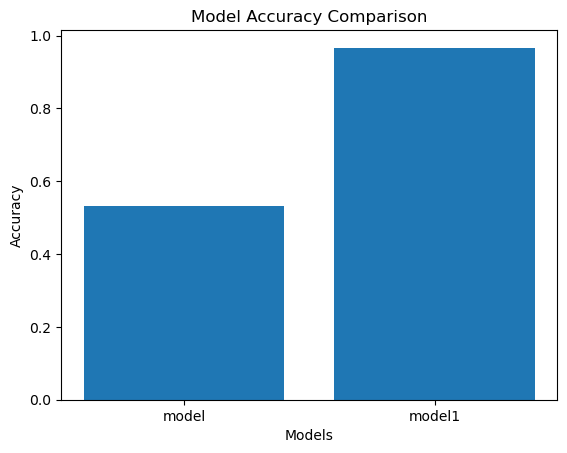

In [35]:
import matplotlib.pyplot as plt

# Define the accuracy scores for two different models
model_names = ['model', 'model1']
accuracy_scores = [0.5333333333333333, 0.9666666666666667]

# Create a bar chart of the accuracy scores
fig, ax = plt.subplots()
ax.bar(model_names, accuracy_scores)

# Set the chart title and labels
ax.set_title('Model Accuracy Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

# Show the chart
plt.show()


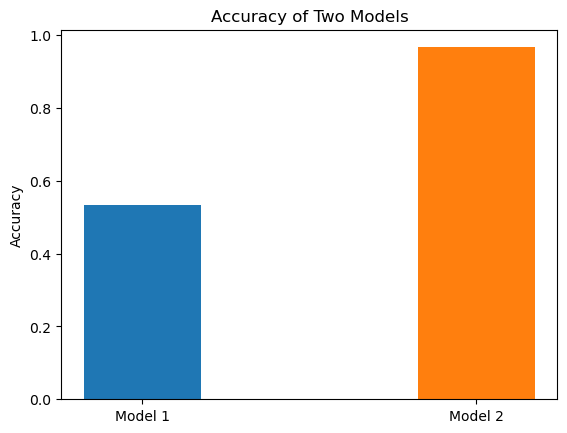

In [36]:
# Example code for visualizing the accuracy of two models

# Define the two models
model_1_accuracy = 0.53333
model_2_accuracy = 0.96667

# Define the labels for the bar chart
model_labels = ["Model 1", "Model 2"]

# Define the accuracy values for each model
accuracy_values = [model_1_accuracy, model_2_accuracy]

# Define the width of each bar
bar_width = 0.35

# Create the bar chart
for i in range(len(model_labels)):
    plt.bar(i, accuracy_values[i], bar_width)

# Add a title and axis labels
plt.title("Accuracy of Two Models")
plt.ylabel("Accuracy")
plt.xticks(range(len(model_labels)), model_labels)

# Show the plot
plt.show()
